# Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import miceforest
import warnings
import seaborn as sns
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

# Importing datasets

In [4]:
# Importing training dataset
Training_data = pd.read_csv('TrainingData.csv')

data = Training_data
data.replace(["C", "L"], [0,1], inplace=True) #Replacing Credit and Lending Card with [0,1]
data = data.drop(columns=['application_key'])
data = data.apply(pd.to_numeric, errors='coerce') #Convering missing values place-holders like missing, na, N/A etc. into NaN

X = data
y = data["default_ind"]

# Miceforest implementation on Training dataset

In [5]:
#Initialisation of miceforest imputer kernel

kernel = miceforest.ImputationKernel(     
  data=X,
  save_all_iterations=True,
  random_state=8
)

kernel.mice(6,verbose=True)  #Kernel will perform 6 iteration in order to impute missing values in dataset

Initialized logger with name mice 1-6
Dataset 0
1  | mvar19 | mvar34 | mvar28 | mvar38 | mvar20 | mvar29 | mvar5 | mvar4 | mvar3 | mvar10 | mvar43 | mvar33 | mvar42 | mvar36 | mvar50 | mvar51 | mvar1 | mvar2 | mvar39 | mvar7 | mvar37 | mvar25 | mvar32 | mvar44 | mvar13 | mvar26 | mvar9 | mvar27 | mvar12 | mvar18 | mvar17 | mvar16 | mvar24 | mvar6 | mvar8 | mvar21 | mvar46 | mvar22 | mvar15 | mvar35 | mvar30 | mvar23 | mvar45 | mvar11 | mvar41 | mvar31 | mvar40
2  | mvar19 | mvar34 | mvar28 | mvar38 | mvar20 | mvar29 | mvar5 | mvar4 | mvar3 | mvar10 | mvar43 | mvar33 | mvar42 | mvar36 | mvar50 | mvar51 | mvar1 | mvar2 | mvar39 | mvar7 | mvar37 | mvar25 | mvar32 | mvar44 | mvar13 | mvar26 | mvar9 | mvar27 | mvar12 | mvar18 | mvar17 | mvar16 | mvar24 | mvar6 | mvar8 | mvar21 | mvar46 | mvar22 | mvar15 | mvar35 | mvar30 | mvar23 | mvar45 | mvar11 | mvar41 | mvar31 | mvar40
3  | mvar19 | mvar34 | mvar28 | mvar38 | mvar20 | mvar29 | mvar5 | mvar4 | mvar3 | mvar10 | mvar43 | mvar33 | mvar42 |

In [6]:
new_data_imputed = kernel.impute_new_data(X)
# Return a completed dataset
new_completed_data = new_data_imputed.complete_data(0)

In [11]:
new_completed_data.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,10.0,0.63899,0.0,0.0,0,10,770,4.0,3080.0,0
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,13.0,0.63836,0.0,0.0,1,732,437,5.0,2185.0,1
2,1745.0,0.4001,0.000,0.0,0.0,399.0,2536.0,719.0,17937.0,2536.0,...,1.0,1.00000,0.0,0.0,0,89,795,4.0,3180.0,1
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,3.0,0.53241,0.0,0.0,1,3,755,4.0,3020.0,0
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,1.0,0.92665,0.0,0.0,1,5,425,4.0,1700.0,0


# Miceforest implementation on Test dataset

In [8]:
Test = pd.read_csv('testX.csv')

data = Test
data.replace(["C", "L"], [0,1], inplace=True) #Replacing Credit and Lending Card with [0,1]
data = data.drop(columns=['application_key'])
data = data.apply(pd.to_numeric, errors='coerce') #Convering missing values place-holders like missing, na, N/A etc. into NaN

test_data = data

In [9]:
kernel = miceforest.ImputationKernel(
  data=test_data,
  save_all_iterations=True,
  random_state=8
)

kernel.mice(6,verbose=True)

Initialized logger with name mice 1-6
Dataset 0
1  | mvar19 | mvar3 | mvar4 | mvar5 | mvar10 | mvar28 | mvar29 | mvar34 | mvar20 | mvar38 | mvar43 | mvar33 | mvar42 | mvar36 | mvar50 | mvar1 | mvar51 | mvar2 | mvar39 | mvar7 | mvar25 | mvar37 | mvar32 | mvar44 | mvar13 | mvar26 | mvar9 | mvar27 | mvar12 | mvar18 | mvar17 | mvar16 | mvar24 | mvar6 | mvar8 | mvar21 | mvar46 | mvar22 | mvar15 | mvar35 | mvar30 | mvar23 | mvar45 | mvar11 | mvar41 | mvar31 | mvar40
2  | mvar19 | mvar3 | mvar4 | mvar5 | mvar10 | mvar28 | mvar29 | mvar34 | mvar20 | mvar38 | mvar43 | mvar33 | mvar42 | mvar36 | mvar50 | mvar1 | mvar51 | mvar2 | mvar39 | mvar7 | mvar25 | mvar37 | mvar32 | mvar44 | mvar13 | mvar26 | mvar9 | mvar27 | mvar12 | mvar18 | mvar17 | mvar16 | mvar24 | mvar6 | mvar8 | mvar21 | mvar46 | mvar22 | mvar15 | mvar35 | mvar30 | mvar23 | mvar45 | mvar11 | mvar41 | mvar31 | mvar40
3  | mvar19 | mvar3 | mvar4 | mvar5 | mvar10 | mvar28 | mvar29 | mvar34 | mvar20 | mvar38 | mvar43 | mvar33 | mvar42 |

In [10]:
test_imputed = kernel.impute_new_data(test_data)
# Return a completed dataset
test_completed_data = test_imputed.complete_data(0)

In [12]:
test_completed_data.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51
0,1719.0,0.6174,8.623,0.0,0.0,258.0,258.0,258.0,10729.0,307.0,...,0.54545,2.0,0.91837,0.0,0.0,0,3247,554,4.0,2216.0
1,1795.0,0.2051,0.000,0.0,0.0,1685.0,12711.0,8913.0,80519.0,18099.0,...,0.17241,4.0,0.94563,0.0,0.0,0,18,554,4.0,2216.0
2,1742.0,0.5082,0.000,0.0,0.0,1185.0,8954.0,8954.0,1189.0,1185.0,...,0.64706,1.0,0.97054,0.0,0.0,0,11,404,4.0,1616.0
3,1685.0,0.2595,25.409,0.0,0.0,217.0,3354.0,5.0,11842.0,3354.0,...,0.85714,1.0,1.00000,0.0,0.0,0,32,528,4.0,2112.0
4,1666.0,1.2678,0.000,0.0,0.0,570.0,570.0,570.0,496.0,570.0,...,1.09091,0.0,0.99617,0.0,0.0,1,89,419,4.0,1676.0


# Saving Training and Test datasets as .csv files

In [13]:
# new_completed_data.to_csv('Mice_Imputed_Train.csv')

# test_completed_data.to_csv('Mice_Imputed_Test.csv')

# Data Generation (SMOTE Over-Sampling)

In [14]:
sm = SMOTE(random_state=42, sampling_strategy=1.0) #Creating SMOTE Instance
X_smote, y_smote = sm.fit_resample(new_completed_data.drop(columns = ['default_ind']), y) #Re-sampling

In [15]:
len(y_smote)

118290

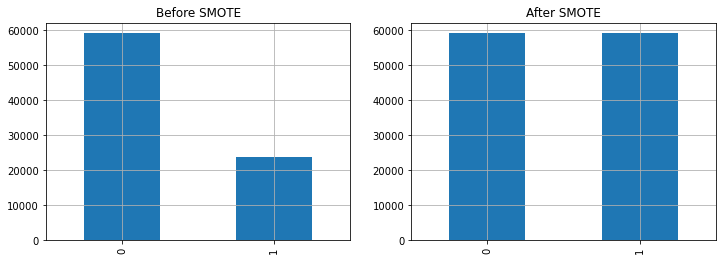

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[12,4])
y.value_counts().plot.bar(grid=True, ax=axes[0], title="Before SMOTE")
y_smote.value_counts().plot.bar(grid=True, ax=axes[1], title="After SMOTE")
plt.show()